# PCA

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE


In [121]:
data_path = 'data/processed/combined_labeled_standardized.csv'
df = pd.read_csv(data_path)

In [122]:
df = df.dropna(axis=1)
# data centered around the origin: healthy
X = df.drop(['healthy', 'patient_id'], axis=1)
Y = df['healthy']

In [89]:
from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='constant', fill_value=0)
# X_imputed = imputer.fit_transform(X)
# X_imputed = X.fillna(0)

In [90]:
# X_scaled = StandardScaler().fit_transform(X_imputed)

In [134]:
# X = X_imputed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 28429 entries, patient_id to ENSG00000288638.1
dtypes: float64(28427), int64(1), object(1)
memory usage: 108.4+ MB


In [123]:
pca_20 = PCA().fit(X)
explained = np.cumsum(pca_20.explained_variance_ratio_)
n_components = np.argmax(explained >= 0.95) + 1

print(f"Number of components for >=95% variance: {n_components}")


Number of components for >=95% variance: 243


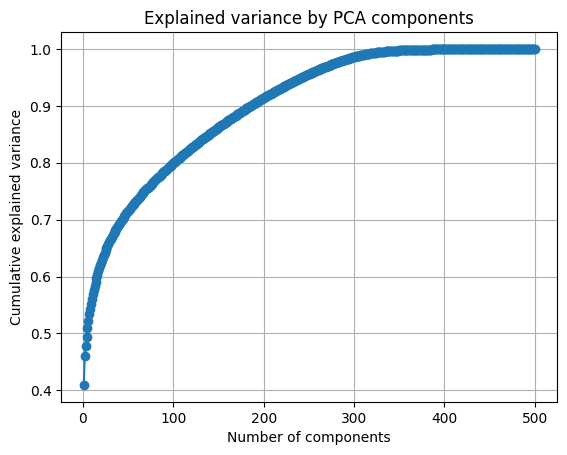

In [124]:
# Visualize explained variance
plt.figure()
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by PCA components')
plt.grid()
plt.show()

In [125]:
clf = RandomForestClassifier(random_state=42)
scores_no_pca = cross_val_score(clf, X, Y, cv=5)
print(f"Accuracy without PCA: {scores_no_pca.mean():.3f}")

pcaN = PCA(n_components=n_components)
X_pcaN = pcaN.fit_transform(X)
scores_pca = cross_val_score(clf, X_pcaN,Y, cv=5)
print(f"Accuracy with PCA ({n_components} components): {scores_pca.mean():.3f}")

Accuracy without PCA: 1.000
Accuracy with PCA (243 components): 0.956


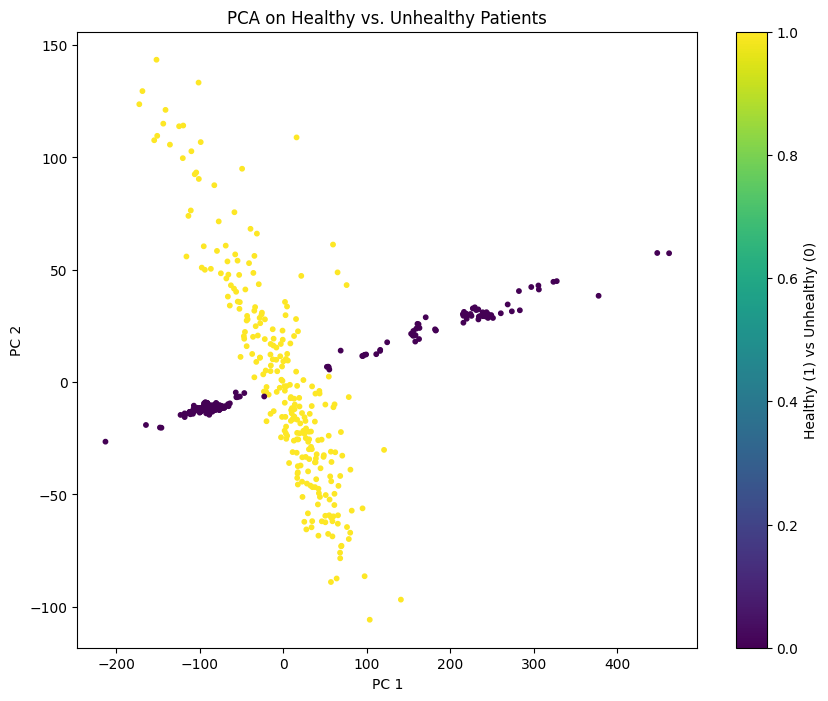

In [126]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pcaN[:, 0], X_pcaN[:, 1], c=Y, cmap='viridis', s=10)
plt.title('PCA on Healthy vs. Unhealthy Patients')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.show()

# SVD Single Value Decomposition (Incremental PCA)

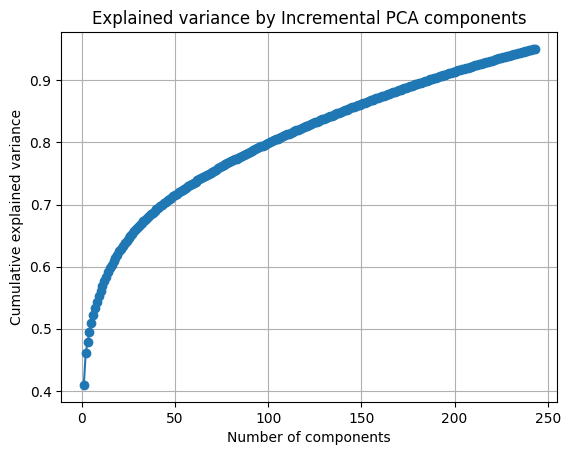

In [103]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=n_components)
X_ipca = ipca.fit_transform(X)

explained_ipca = np.cumsum(ipca.explained_variance_ratio_)
plt.figure()
plt.plot(np.arange(1, len(explained_ipca) + 1), explained_ipca, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by Incremental PCA components')
plt.grid()
plt.show()

# LDA

In [132]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: healthy
Non-Null Count  Dtype
--------------  -----
500 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=n_components - 1) 
X_lda = lda.fit_transform(X, Y)

# Step 4: Plot the result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=Y, cmap='viridis', edgecolor='k', s=60)
plt.title("LDA: Linear Discriminant Analysis on Iris Dataset")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.colorbar(scatter, ticks=[0, 1, 2], label="Iris Class")
plt.grid(True)
plt.show()

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

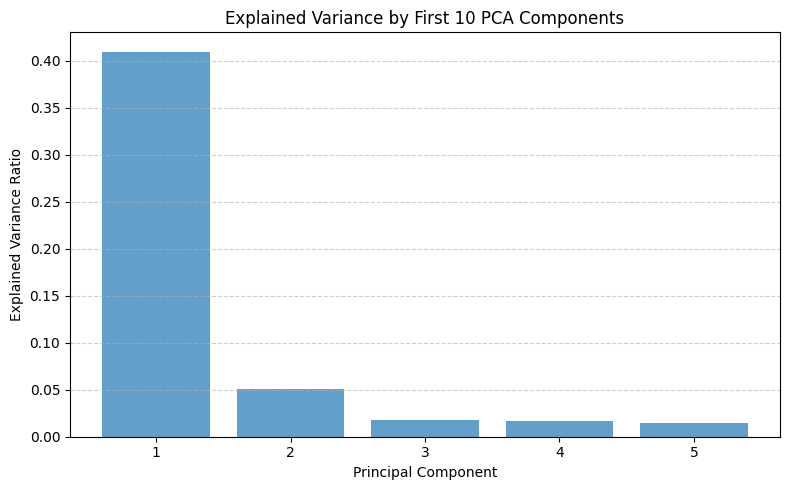

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Get explained variance ratio
explained_var = pcaN.explained_variance_ratio_

# Plot first 10 components
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), explained_var[:5], alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by First 10 PCA Components')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(np.arange(1, 6))
plt.tight_layout()
plt.show()

# TSNE

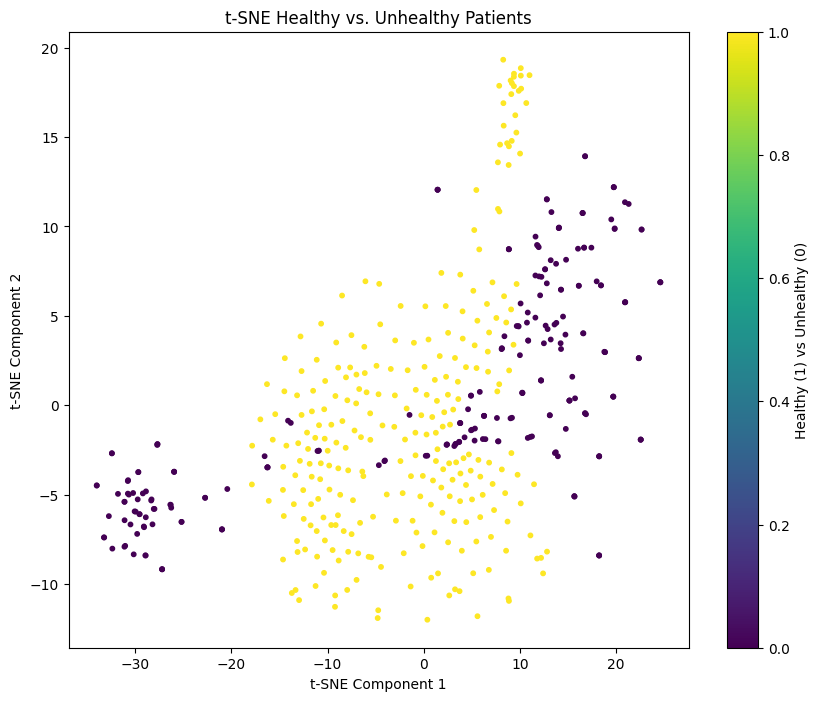

In [133]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis', s=10)
plt.title('t-SNE Healthy vs. Unhealthy Patients')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.show()

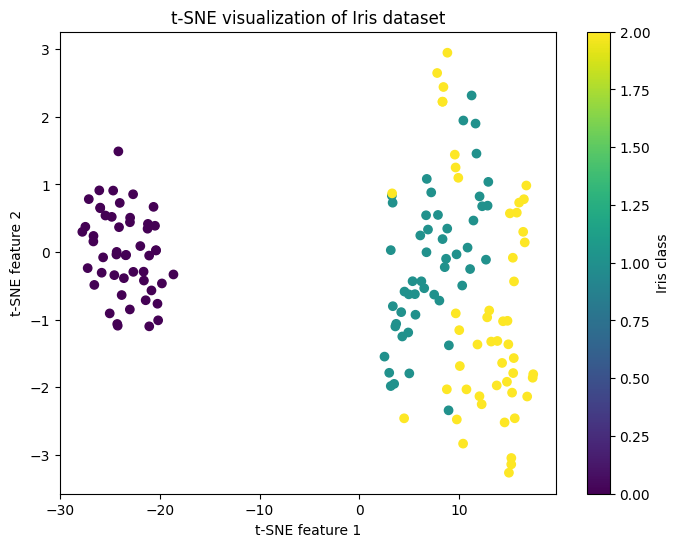

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Iris dataset
iris = load_iris()
X_iris = iris.data      # 4 features: sepal/petal length/width
y_iris = iris.target    # 3 classes

# Step 2: Standardize the data (important for t-SNE)
X_scaled_iris = StandardScaler().fit_transform(X_iris)

# Step 3: Apply t-SNE
tsne_iris = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_iris = tsne_iris.fit_transform(X_scaled_iris)

# Step 4: Visualize the 2D projection
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne_iris[:, 0], X_tsne_iris[:, 1], c=y_iris, cmap='viridis')
plt.title("t-SNE visualization of Iris dataset")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.colorbar(scatter, label='Iris class')
plt.show()


#### ✅ **What is t-SNE (t-distributed Stochastic Neighbor Embedding)?**

* A **nonlinear**, technique designed 
* Works well on nonlinear data.

* Focuses on preserving **local structure** — i.e., keeps similar points close together.

**When to use t-SNE:**
* For complex, high-dimensional data like gene expression or embeddings.
for **visualizing high-dimensional data** in 2D or 3D.
* When your goal is **exploration and visualization**, not modeling.

**Cons:**

* Slow and computationally expensive.
* Not reusable — can't apply same transformation to new data.
* Distorts global distances — can't trust inter-cluster spacing.
* Not suitable for model training.

---

### ❌ **Why t-SNE is not suitable for model training**

* It does **not learn a general function** you can apply to new data (non-parametric).
* It's **non-deterministic** — results change slightly on every run.
* It distorts global geometry — cluster distances are not meaningful.
* Classifiers trained on t-SNE output often perform **worse** than with raw or PCA-transformed data.

---

### 📊 **Dimensionality Reduction: PCA vs t-SNE**

#### ✅ **What is PCA (Principal Component Analysis)?**

* A **linear** dimensionality reduction technique.
* Projects data to a new set of axes (principal components) that **maximize variance**.
* Unsupervised and fast — good for preprocessing, noise reduction, and compression.

**When to use PCA:**

* When you want to reduce dimensionality for model training.
* When interpretability and global structure matter.
* When your data has mostly **linear relationships**.

**Pros:**

* Fast and scalable.
* Produces interpretable components.
* Can be used in training pipelines (learned transformation is reusable).

**Cons:**

* Can't handle complex nonlinear patterns well.
* Assumes data is on a flat plane (linear structure).

---

### 🧠 Summary Table: PCA vs t-SNE

| Feature                    | PCA                           | t-SNE               |
| -------------------------- | ----------------------------- | ------------------- |
| Type                       | Linear                        | Nonlinear           |
| Purpose                    | Feature reduction             | Visualization       |
| Structure preserved        | Global variance               | Local neighborhoods |
| Speed                      | Fast                          | Slow                |
| Interpretability           | High (eigenvectors)           | Low                 |
| Model training suitability | ✅ Yes                         | ❌ No                |
| Reusable on new data       | ✅ Yes                         | ❌ No                |
| Output dimensions          | Configurable (`n_components`) | Typically 2 or 3    |



In [143]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Assume X is scaled gene expression data
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)



c:\dev\ai-brain-tumor\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\dev\ai-brain-tumor\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


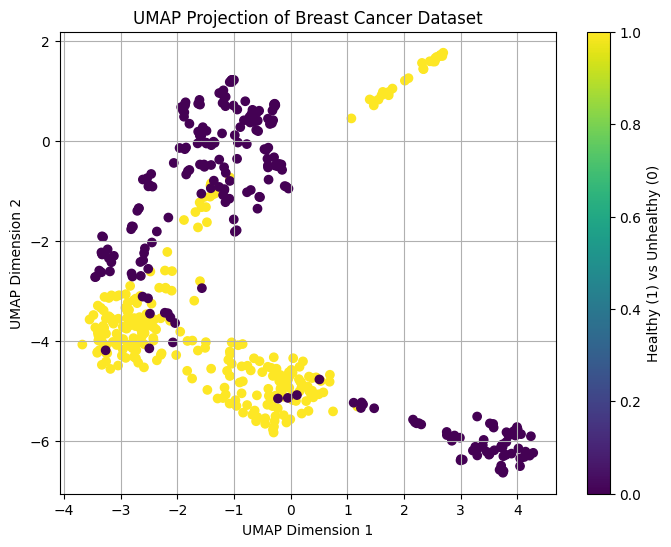

In [142]:
plt.figure(figsize=(8, 6))
# plt.scatter(X_umap[:, 0], X_umap[:, 1], c=Y, cmap='Spectral')
plt.scatter(x=X_umap[:, 0], y=X_umap[:, 1], c=Y, cmap='viridis')
plt.title("UMAP Projection of Breast Cancer Dataset")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
# plt.legend(labels=target_names)
plt.grid(True)
plt.show()